# Part 5: Training NNs on Clustered data following Dimensionality Reduction

In [1]:
# Basic Setup

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.decomposition import PCA, FastICA, TruncatedSVD
from sklearn.random_projection import GaussianRandomProjection
from scipy.stats import kurtosis

## Dimensionality Reduction on Car Dataset

In [2]:
# Car Dataset Setup

cars_df = pd.read_csv("data/car_evaluation.csv", names = ["buying","maint", "doors", "persons", "lug_boot","safety","class"])
cars_df.head()
cleanup_nums = {"class":     {"unacc": 4, "acc": 3,'good': 2,'vgood':1}
                }
cars_df.replace(cleanup_nums,inplace = True)
target = cars_df['class']
print(target.value_counts())

cars_df.drop( ['class'],axis = 1,inplace = True)
cars_df_categorical = pd.get_dummies(cars_df)
cars_df_categorical.head()

X_train,X_test,Y_train,Y_test = train_test_split(cars_df_categorical, target, random_state=42)

print(len(X_train))
print(len(Y_train))
print(len(X_test))
print(len(Y_test))

target.value_counts()

sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

storage = {
    'ica_kurt': [],
    'rp_kurt': [],
}


whole_dataset = np.concatenate((X_train_std,X_test),axis=0)
print(whole_dataset.shape)

4    1210
3     384
2      69
1      65
Name: class, dtype: int64
1296
1296
432
432
(1728, 21)


/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/ipykernel_launcher.py:26: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/ipykernel_launcher.py:27: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.


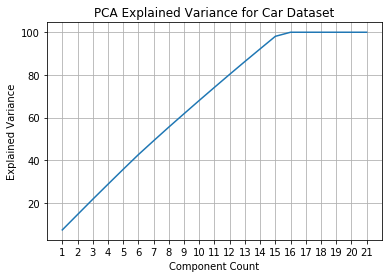

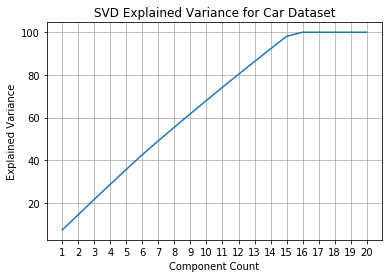

(1728, 14)


In [3]:
# PCA

car_pca = PCA()
car_reduced_X_train = car_pca.fit_transform(whole_dataset)

plt.figure()
plt.plot(np.arange(1,22), 100*np.cumsum(car_pca.explained_variance_ratio_))
plt.title('PCA Explained Variance for Car Dataset')
plt.ylabel('Explained Variance')
plt.xlabel('Component Count')
plt.grid()
plt.xticks(np.arange(1,22))
plt.show()



# SVD

car_svd = TruncatedSVD(n_components=20)
car_reduced_X_train = car_svd.fit_transform(whole_dataset)

plt.figure()
plt.plot(np.arange(1,21), 100*np.cumsum(car_svd.explained_variance_ratio_))
plt.title('SVD Explained Variance for Car Dataset')
plt.ylabel('Explained Variance')
plt.xlabel('Component Count')
plt.grid()
plt.xticks(np.arange(1,21))
plt.show()


#final datasets for nn 
pca_dataset = PCA(n_components=14).fit_transform(whole_dataset)
print(pca_dataset.shape)
svd_dataset = TruncatedSVD(n_components=15).fit_transform(whole_dataset)


/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/decomposition/fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/decomposition/fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/decomposition/fastica_.py:305: UserWarning: n_components is too large: it will be set to 21
  warnings.warn('n_components is too large: it will be set to %s' % n_components)
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/decomposition/fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceW

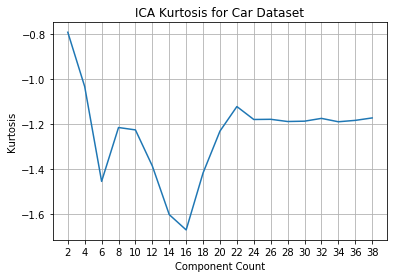

In [4]:
# ICA

component_range = np.arange(2, 40, 2)

for i in component_range:
    car_ica = FastICA(n_components=i)
    car_reduced_X_train  = car_ica.fit_transform(X_train)
    storage['ica_kurt'].append(np.mean(kurtosis(car_reduced_X_train)))

plt.figure()
plt.plot(component_range, storage['ica_kurt'])
plt.title('ICA Kurtosis for Car Dataset')
plt.ylabel('Kurtosis')
plt.xlabel('Component Count')
plt.grid()
plt.xticks(component_range)
plt.show()

/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/random_projection.py:379: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (21 < 22).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/random_projection.py:379: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (21 < 24).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/random_projection.py:379: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (21 < 26).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)
/Users/harshsikka/opt/anaconda3/envs/

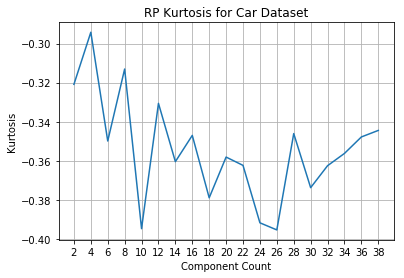

/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/random_projection.py:379: DataDimensionalityWarning: The number of components is higher than the number of features: n_features < n_components (21 < 32).The dimensionality of the problem will not be reduced.
  DataDimensionalityWarning)


In [5]:
# RP

component_range = np.arange(2, 40, 2)

for i in component_range:
    car_rp = GaussianRandomProjection(n_components=i)
    car_reduced_X_train  = car_rp.fit_transform(X_train)
    storage['rp_kurt'].append(np.mean(kurtosis(car_reduced_X_train)))

plt.figure()
plt.plot(component_range, storage['rp_kurt'])
plt.title('RP Kurtosis for Car Dataset')
plt.ylabel('Kurtosis')
plt.xlabel('Component Count')
plt.grid()
plt.xticks(component_range)
plt.show()

#final datasets for nn 
rp_dataset = GaussianRandomProjection(n_components=32).fit_transform(whole_dataset)
ica_dataset = FastICA(n_components=16).fit_transform(whole_dataset)

## Clustering on Car Dataset

In [6]:
# Basic Setup

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, silhouette_score, davies_bouldin_score


### Clustering on PCA

/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harsh

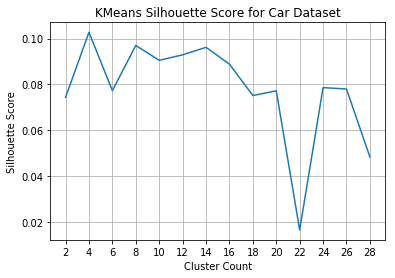

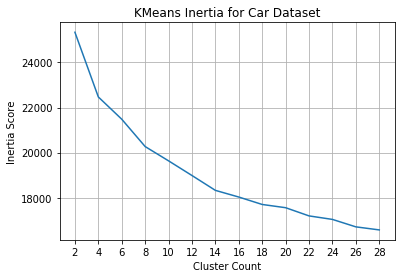

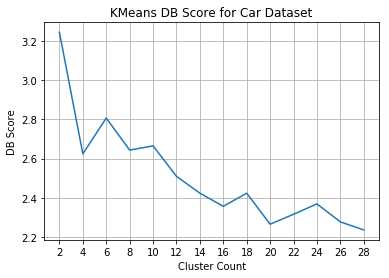

/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harsh

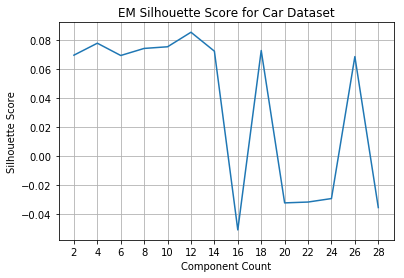

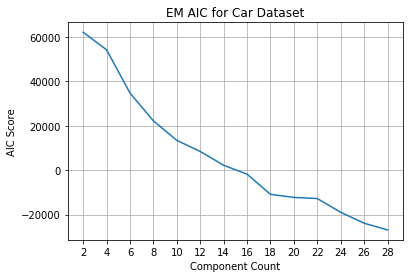

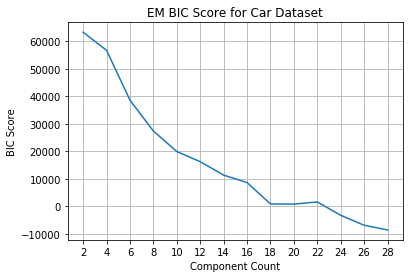

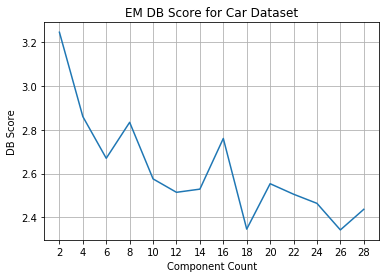

In [7]:
#KMeans

storage = {
    'silhouette_score': [],
    'inertia_score': [],
    'db_score': [],
}

cluster_range = np.arange(2, 30, 2)

for i in cluster_range:
    km_model = KMeans(n_clusters=i, random_state=42)
    storage['silhouette_score'].append(silhouette_score(pca_dataset, km_model.fit_predict(pca_dataset)))
    storage['inertia_score'].append(km_model.inertia_)
    storage['db_score'].append(davies_bouldin_score(pca_dataset, km_model.fit_predict(pca_dataset)))
plt.figure()
plt.plot(cluster_range, storage['silhouette_score'])
plt.title('KMeans Silhouette Score for Car Dataset')
plt.ylabel('Silhouette Score')
plt.xlabel('Cluster Count')
plt.xticks(cluster_range)
plt.grid()
plt.show()

pca_kmeans_data = km_model.labels_

plt.figure()
plt.plot(cluster_range, storage['inertia_score'])
plt.title('KMeans Inertia for Car Dataset')
plt.ylabel('Inertia Score')
plt.xlabel('Cluster Count')
plt.xticks(cluster_range)
plt.grid()
plt.show()

plt.figure()
plt.plot(cluster_range, storage['db_score'])
plt.title('KMeans DB Score for Car Dataset')
plt.ylabel('DB Score')
plt.xlabel('Cluster Count')
plt.xticks(cluster_range)
plt.grid()
plt.show()

#EM

storage = {
    'silhouette_score': [],
    'aic_score': [],
    'bic_score': [],
    'db_score': [],
}

Component_range = np.arange(2, 30, 2)

for i in Component_range:
    em_model = GaussianMixture(n_components=i, random_state=42)
    em_model.fit(pca_dataset)
    storage['bic_score'].append(em_model.bic(pca_dataset))
    storage['aic_score'].append(em_model.aic(pca_dataset))
    storage['silhouette_score'].append(silhouette_score(pca_dataset, em_model.fit_predict(pca_dataset)))
    storage['db_score'].append(davies_bouldin_score(pca_dataset, em_model.fit_predict(pca_dataset)))

pca_em_data = em_model.score_samples(pca_dataset)
plt.figure()
plt.plot(Component_range, storage['silhouette_score'])
plt.title('EM Silhouette Score for Car Dataset')
plt.ylabel('Silhouette Score')
plt.xlabel('Component Count')
plt.xticks(Component_range)
plt.grid()
plt.show()

plt.figure()
plt.plot(Component_range, storage['aic_score'])
plt.title('EM AIC for Car Dataset')
plt.ylabel('AIC Score')
plt.xlabel('Component Count')
plt.xticks(Component_range)
plt.grid()
plt.show()

plt.figure()
plt.plot(Component_range, storage['bic_score'])
plt.title('EM BIC Score for Car Dataset')
plt.ylabel('BIC Score')
plt.xlabel('Component Count')
plt.xticks(Component_range)
plt.grid()
plt.show()


plt.figure()
plt.plot(cluster_range, storage['db_score'])
plt.title('EM DB Score for Car Dataset')
plt.ylabel('DB Score')
plt.xlabel('Component Count')
plt.xticks(cluster_range)
plt.grid()
plt.show()

### Clustering on SVD

/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harsh

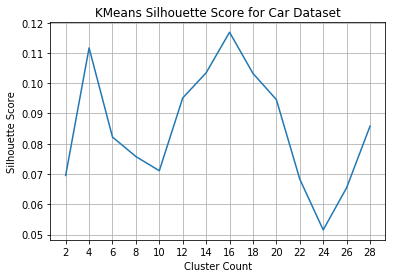

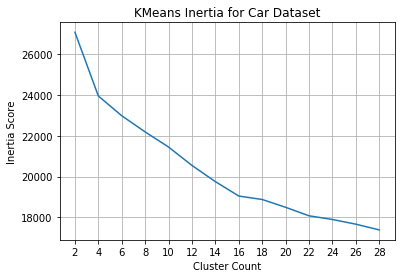

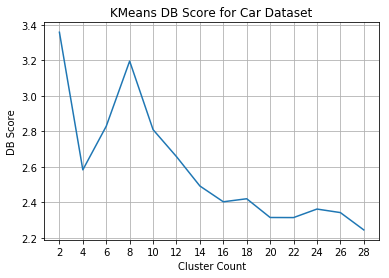

/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harsh

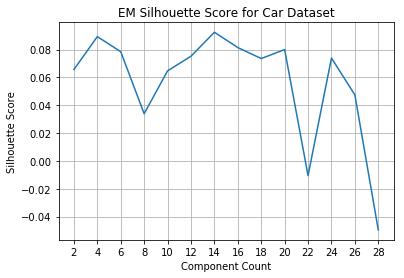

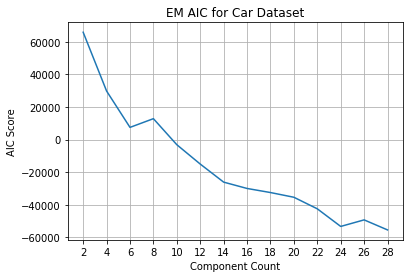

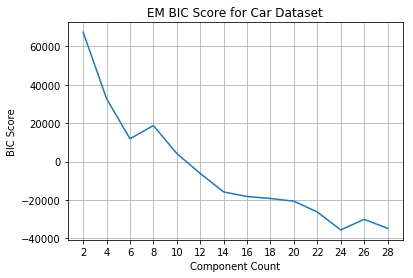

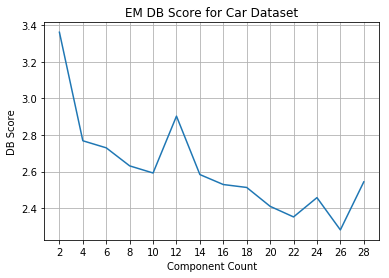

In [8]:
#KMeans

storage = {
    'silhouette_score': [],
    'inertia_score': [],
    'db_score': [],
}

cluster_range = np.arange(2, 30, 2)

for i in cluster_range:
    km_model = KMeans(n_clusters=i, random_state=42)
    storage['silhouette_score'].append(silhouette_score(svd_dataset, km_model.fit_predict(svd_dataset)))
    storage['inertia_score'].append(km_model.inertia_)
    storage['db_score'].append(davies_bouldin_score(svd_dataset, km_model.fit_predict(svd_dataset)))
    
svd_kmeans_data = km_model.labels_

plt.figure()
plt.plot(cluster_range, storage['silhouette_score'])
plt.title('KMeans Silhouette Score for Car Dataset')
plt.ylabel('Silhouette Score')
plt.xlabel('Cluster Count')
plt.xticks(cluster_range)
plt.grid()
plt.show()

plt.figure()
plt.plot(cluster_range, storage['inertia_score'])
plt.title('KMeans Inertia for Car Dataset')
plt.ylabel('Inertia Score')
plt.xlabel('Cluster Count')
plt.xticks(cluster_range)
plt.grid()
plt.show()

plt.figure()
plt.plot(cluster_range, storage['db_score'])
plt.title('KMeans DB Score for Car Dataset')
plt.ylabel('DB Score')
plt.xlabel('Cluster Count')
plt.xticks(cluster_range)
plt.grid()
plt.show()

#EM

storage = {
    'silhouette_score': [],
    'aic_score': [],
    'bic_score': [],
    'db_score': [],
}

Component_range = np.arange(2, 30, 2)

for i in Component_range:
    em_model = GaussianMixture(n_components=i, random_state=42)
    em_model.fit(svd_dataset)
    storage['bic_score'].append(em_model.bic(svd_dataset))
    storage['aic_score'].append(em_model.aic(svd_dataset))
    storage['silhouette_score'].append(silhouette_score(svd_dataset, em_model.fit_predict(svd_dataset)))
    storage['db_score'].append(davies_bouldin_score(svd_dataset, em_model.fit_predict(svd_dataset)))

svd_em_data = em_model.score_samples(svd_dataset)    
    
plt.figure()
plt.plot(Component_range, storage['silhouette_score'])
plt.title('EM Silhouette Score for Car Dataset')
plt.ylabel('Silhouette Score')
plt.xlabel('Component Count')
plt.xticks(Component_range)
plt.grid()
plt.show()

plt.figure()
plt.plot(Component_range, storage['aic_score'])
plt.title('EM AIC for Car Dataset')
plt.ylabel('AIC Score')
plt.xlabel('Component Count')
plt.xticks(Component_range)
plt.grid()
plt.show()

plt.figure()
plt.plot(Component_range, storage['bic_score'])
plt.title('EM BIC Score for Car Dataset')
plt.ylabel('BIC Score')
plt.xlabel('Component Count')
plt.xticks(Component_range)
plt.grid()
plt.show()


plt.figure()
plt.plot(cluster_range, storage['db_score'])
plt.title('EM DB Score for Car Dataset')
plt.ylabel('DB Score')
plt.xlabel('Component Count')
plt.xticks(cluster_range)
plt.grid()
plt.show()

### Clustering on RP

/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harsh

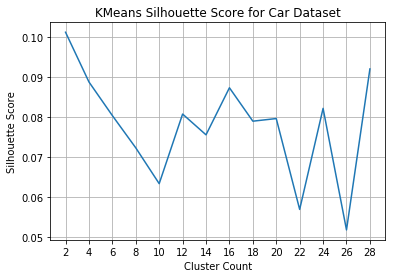

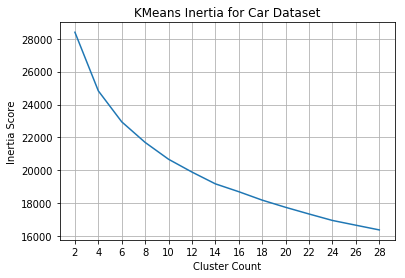

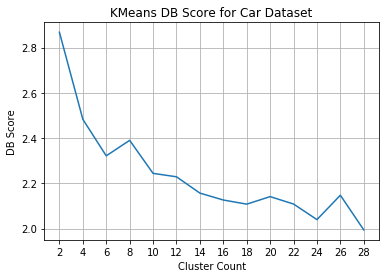

/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harsh

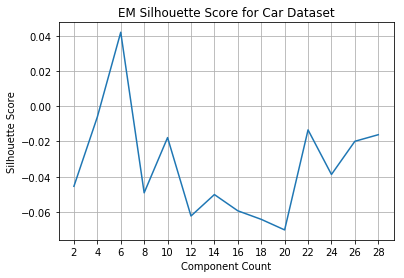

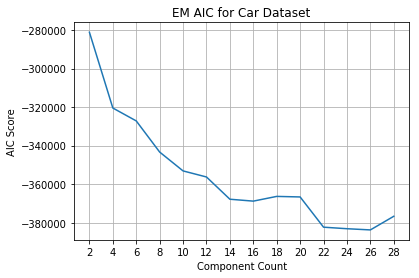

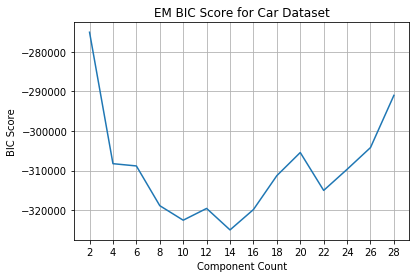

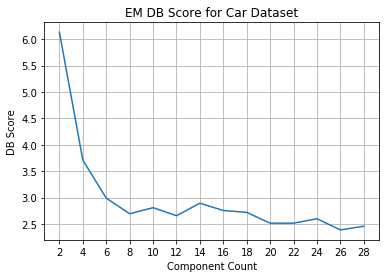

In [9]:
#KMeans

storage = {
    'silhouette_score': [],
    'inertia_score': [],
    'db_score': [],
}

cluster_range = np.arange(2, 30, 2)

for i in cluster_range:
    km_model = KMeans(n_clusters=i, random_state=42)
    storage['silhouette_score'].append(silhouette_score(rp_dataset, km_model.fit_predict(rp_dataset)))
    storage['inertia_score'].append(km_model.inertia_)
    storage['db_score'].append(davies_bouldin_score(rp_dataset, km_model.fit_predict(rp_dataset)))

rp_kmeans_data = km_model.labels_
    
plt.figure()
plt.plot(cluster_range, storage['silhouette_score'])
plt.title('KMeans Silhouette Score for Car Dataset')
plt.ylabel('Silhouette Score')
plt.xlabel('Cluster Count')
plt.xticks(cluster_range)
plt.grid()
plt.show()

plt.figure()
plt.plot(cluster_range, storage['inertia_score'])
plt.title('KMeans Inertia for Car Dataset')
plt.ylabel('Inertia Score')
plt.xlabel('Cluster Count')
plt.xticks(cluster_range)
plt.grid()
plt.show()

plt.figure()
plt.plot(cluster_range, storage['db_score'])
plt.title('KMeans DB Score for Car Dataset')
plt.ylabel('DB Score')
plt.xlabel('Cluster Count')
plt.xticks(cluster_range)
plt.grid()
plt.show()

#EM

storage = {
    'silhouette_score': [],
    'aic_score': [],
    'bic_score': [],
    'db_score': [],
}

Component_range = np.arange(2, 30, 2)

for i in Component_range:
    em_model = GaussianMixture(n_components=i, random_state=42)
    em_model.fit(rp_dataset)
    storage['bic_score'].append(em_model.bic(rp_dataset))
    storage['aic_score'].append(em_model.aic(rp_dataset))
    storage['silhouette_score'].append(silhouette_score(rp_dataset, em_model.fit_predict(rp_dataset)))
    storage['db_score'].append(davies_bouldin_score(rp_dataset, em_model.fit_predict(rp_dataset)))
    
rp_em_data = em_model.score_samples(rp_dataset)

plt.figure()
plt.plot(Component_range, storage['silhouette_score'])
plt.title('EM Silhouette Score for Car Dataset')
plt.ylabel('Silhouette Score')
plt.xlabel('Component Count')
plt.xticks(Component_range)
plt.grid()
plt.show()

plt.figure()
plt.plot(Component_range, storage['aic_score'])
plt.title('EM AIC for Car Dataset')
plt.ylabel('AIC Score')
plt.xlabel('Component Count')
plt.xticks(Component_range)
plt.grid()
plt.show()

plt.figure()
plt.plot(Component_range, storage['bic_score'])
plt.title('EM BIC Score for Car Dataset')
plt.ylabel('BIC Score')
plt.xlabel('Component Count')
plt.xticks(Component_range)
plt.grid()
plt.show()


plt.figure()
plt.plot(cluster_range, storage['db_score'])
plt.title('EM DB Score for Car Dataset')
plt.ylabel('DB Score')
plt.xlabel('Component Count')
plt.xticks(cluster_range)
plt.grid()
plt.show()

### Clustering on ICA

/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harsh

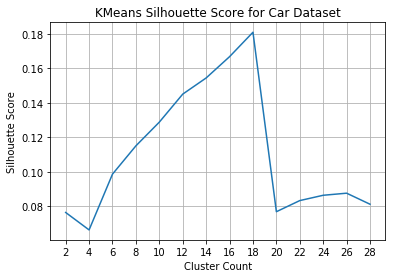

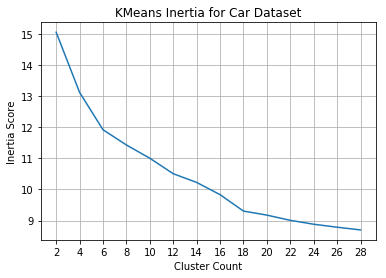

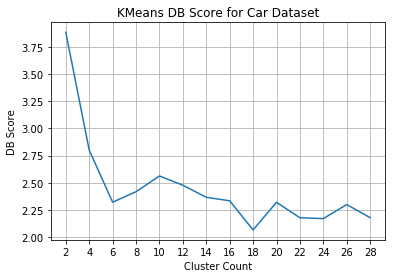

/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/harsh

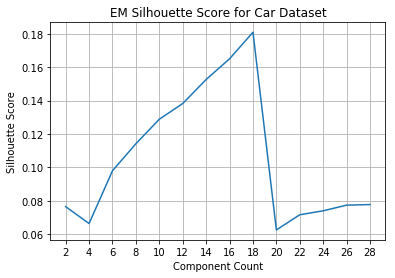

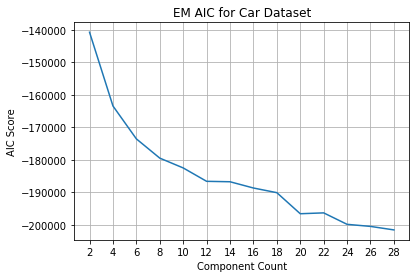

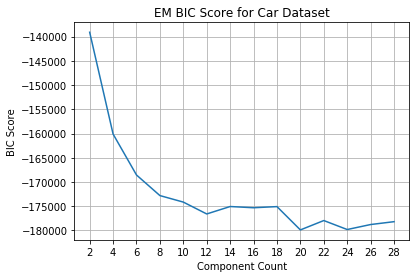

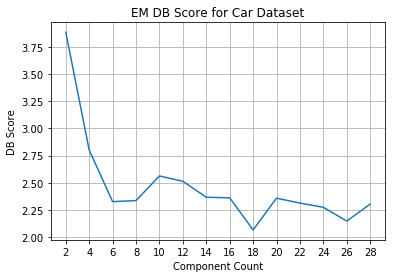

In [10]:
#KMeans

storage = {
    'silhouette_score': [],
    'inertia_score': [],
    'db_score': [],
}

cluster_range = np.arange(2, 30, 2)

for i in cluster_range:
    km_model = KMeans(n_clusters=i, random_state=42)
    storage['silhouette_score'].append(silhouette_score(ica_dataset, km_model.fit_predict(ica_dataset)))
    storage['inertia_score'].append(km_model.inertia_)
    storage['db_score'].append(davies_bouldin_score(ica_dataset, km_model.fit_predict(ica_dataset)))

ica_kmeans_data = km_model.labels_

plt.figure()
plt.plot(cluster_range, storage['silhouette_score'])
plt.title('KMeans Silhouette Score for Car Dataset')
plt.ylabel('Silhouette Score')
plt.xlabel('Cluster Count')
plt.xticks(cluster_range)
plt.grid()
plt.show()

plt.figure()
plt.plot(cluster_range, storage['inertia_score'])
plt.title('KMeans Inertia for Car Dataset')
plt.ylabel('Inertia Score')
plt.xlabel('Cluster Count')
plt.xticks(cluster_range)
plt.grid()
plt.show()

plt.figure()
plt.plot(cluster_range, storage['db_score'])
plt.title('KMeans DB Score for Car Dataset')
plt.ylabel('DB Score')
plt.xlabel('Cluster Count')
plt.xticks(cluster_range)
plt.grid()
plt.show()

#EM

storage = {
    'silhouette_score': [],
    'aic_score': [],
    'bic_score': [],
    'db_score': [],
}

Component_range = np.arange(2, 30, 2)

for i in Component_range:
    em_model = GaussianMixture(n_components=i, random_state=42)
    em_model.fit(ica_dataset)
    storage['bic_score'].append(em_model.bic(ica_dataset))
    storage['aic_score'].append(em_model.aic(ica_dataset))
    storage['silhouette_score'].append(silhouette_score(ica_dataset, em_model.fit_predict(ica_dataset)))
    storage['db_score'].append(davies_bouldin_score(ica_dataset, em_model.fit_predict(ica_dataset)))

ica_em_data = em_model.score_samples(ica_dataset)


plt.figure()
plt.plot(Component_range, storage['silhouette_score'])
plt.title('EM Silhouette Score for Car Dataset')
plt.ylabel('Silhouette Score')
plt.xlabel('Component Count')
plt.xticks(Component_range)
plt.grid()
plt.show()

plt.figure()
plt.plot(Component_range, storage['aic_score'])
plt.title('EM AIC for Car Dataset')
plt.ylabel('AIC Score')
plt.xlabel('Component Count')
plt.xticks(Component_range)
plt.grid()
plt.show()

plt.figure()
plt.plot(Component_range, storage['bic_score'])
plt.title('EM BIC Score for Car Dataset')
plt.ylabel('BIC Score')
plt.xlabel('Component Count')
plt.xticks(Component_range)
plt.grid()
plt.show()


plt.figure()
plt.plot(cluster_range, storage['db_score'])
plt.title('EM DB Score for Car Dataset')
plt.ylabel('DB Score')
plt.xlabel('Component Count')
plt.xticks(cluster_range)
plt.grid()
plt.show()

## Neural Net on Clustered Features Only

In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
import time

In [12]:
# PCA 

# K means
print(pca_dataset.reshape(-1, 1).shape)
nn = MLPClassifier(max_iter=2000,early_stopping=True,random_state=55)

best_nn = GridSearchCV(nn, param_grid={'alpha' : np.logspace(-1, 2, 5), 'learning_rate_init' : np.logspace(-5, 0, 6)}, cv=5, n_jobs=4)
train_t0 = time.time()
best_nn.fit(pca_kmeans_data[0:1296].reshape(-1, 1), Y_train)
train_t1 = time.time()
t0 = time.time()
prediction = best_nn.predict(pca_kmeans_data[1296:].reshape(-1, 1))
t1 = time.time()

print('Train Time: ', train_t1 - train_t0)
print('Test Time: ', t1 - t0)
print('Top Accuracy:', (accuracy_score(Y_test, prediction) * 100))
print('Top params: ', best_nn.best_params_)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, prediction))

(24192, 1)
Train Time:  3.125406265258789
Test Time:  0.0006227493286132812
Top Accuracy: 68.05555555555556
Top params:  {'alpha': 0.1, 'learning_rate_init': 0.01}
[[  0   0   0  20]
 [  0   0   0  15]
 [  0   0   0 103]
 [  0   0   0 294]]


In [13]:
# ICA 

# K means
print(ica_kmeans_data.reshape(-1, 1).shape)
nn = MLPClassifier(max_iter=2000,early_stopping=True,random_state=55)

best_nn = GridSearchCV(nn, param_grid={'alpha' : np.logspace(-1, 2, 5), 'learning_rate_init' : np.logspace(-5, 0, 6)}, cv=5, n_jobs=4)
train_t0 = time.time()
best_nn.fit(ica_kmeans_data[0:1296].reshape(-1, 1), Y_train)
train_t1 = time.time()
t0 = time.time()
prediction = best_nn.predict(ica_kmeans_data[1296:].reshape(-1, 1))
t1 = time.time()

print('Train Time: ', train_t1 - train_t0)
print('Test Time: ', t1 - t0)
print('Top Accuracy:', (accuracy_score(Y_test, prediction) * 100))
print('Top params: ', best_nn.best_params_)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, prediction))

(1728, 1)
Train Time:  2.1150519847869873
Test Time:  0.0003662109375
Top Accuracy: 68.05555555555556
Top params:  {'alpha': 0.1, 'learning_rate_init': 0.001}
[[  0   0   0  20]
 [  0   0   0  15]
 [  0   0   0 103]
 [  0   0   0 294]]


In [14]:
# SVD

# K means

nn = MLPClassifier(max_iter=2000,early_stopping=True,random_state=55)

best_nn = GridSearchCV(nn, param_grid={'alpha' : np.logspace(-1, 2, 5), 'learning_rate_init' : np.logspace(-5, 0, 6)}, cv=5, n_jobs=4)
train_t0 = time.time()
best_nn.fit(svd_kmeans_data[0:1296].reshape(-1, 1), Y_train)
train_t1 = time.time()
t0 = time.time()
prediction = best_nn.predict(svd_kmeans_data[1296:].reshape(-1, 1))
t1 = time.time()

print('Train Time: ', train_t1 - train_t0)
print('Test Time: ', t1 - t0)
print('Top Accuracy:', (accuracy_score(Y_test, prediction) * 100))
print('Top params: ', best_nn.best_params_)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, prediction))

Train Time:  2.037961959838867
Test Time:  0.0003619194030761719
Top Accuracy: 68.05555555555556
Top params:  {'alpha': 0.5623413251903491, 'learning_rate_init': 0.01}
[[  0   0   0  20]
 [  0   0   0  15]
 [  0   0   0 103]
 [  0   0   0 294]]


In [15]:
# RP

# K means

nn = MLPClassifier(max_iter=2000,early_stopping=True,random_state=55)

best_nn = GridSearchCV(nn, param_grid={'alpha' : np.logspace(-1, 2, 5), 'learning_rate_init' : np.logspace(-5, 0, 6)}, cv=5, n_jobs=4)
train_t0 = time.time()
best_nn.fit(rp_kmeans_data[0:1296].reshape(-1, 1), Y_train)
train_t1 = time.time()
t0 = time.time()
prediction = best_nn.predict(rp_kmeans_data[1296:].reshape(-1, 1))
t1 = time.time()

print('Train Time: ', train_t1 - train_t0)
print('Test Time: ', t1 - t0)
print('Top Accuracy:', (accuracy_score(Y_test, prediction) * 100))
print('Top params: ', best_nn.best_params_)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, prediction))

Train Time:  2.1240029335021973
Test Time:  0.0003750324249267578
Top Accuracy: 68.05555555555556
Top params:  {'alpha': 0.1, 'learning_rate_init': 0.001}
[[  0   0   0  20]
 [  0   0   0  15]
 [  0   0   0 103]
 [  0   0   0 294]]


## Neural Net on Augmented Dataset with Clustering

In [16]:
# PCA 



# K means
X_train = np.concatenate((X_train,pca_kmeans_data[0:1296].reshape(-1, 1)), axis=1) 
X_test = np.concatenate((X_test,pca_kmeans_data[1296:].reshape(-1, 1)), axis=1) 

sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

nn = MLPClassifier(max_iter=2000,early_stopping=True,random_state=55)

best_nn = GridSearchCV(nn, param_grid={'alpha' : np.logspace(-1, 2, 5), 'learning_rate_init' : np.logspace(-5, 0, 6)}, cv=5, n_jobs=4)
train_t0 = time.time()
best_nn.fit(X_train_std, Y_train)
train_t1 = time.time()
t0 = time.time()
prediction = best_nn.predict(X_test_std)
t1 = time.time()

print('Train Time: ', train_t1 - train_t0)
print('Test Time: ', t1 - t0)
print('Top Accuracy:', (accuracy_score(Y_test, prediction) * 100))
print('Top params: ', best_nn.best_params_)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, prediction))

# EM

X_train = np.concatenate((X_train,pca_em_data[0:1296].reshape(-1, 1)), axis=1) 
X_test = np.concatenate((X_test,pca_em_data[1296:].reshape(-1, 1)), axis=1) 

sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

nn = MLPClassifier(max_iter=2000,early_stopping=True,random_state=55)

best_nn = GridSearchCV(nn, param_grid={'alpha' : np.logspace(-1, 2, 5), 'learning_rate_init' : np.logspace(-5, 0, 6)}, cv=5, n_jobs=4)
train_t0 = time.time()
best_nn.fit(X_train_std, Y_train)
train_t1 = time.time()
t0 = time.time()
prediction = best_nn.predict(X_test_std)
t1 = time.time()

print('Train Time: ', train_t1 - train_t0)
print('Test Time: ', t1 - t0)
print('Top Accuracy:', (accuracy_score(Y_test, prediction) * 100))
print('Top params: ', best_nn.best_params_)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, prediction))



/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Train Time:  5.647536993026733
Test Time:  0.000415802001953125
Top Accuracy: 98.37962962962963
Top params:  {'alpha': 0.1, 'learning_rate_init': 0.1}
[[ 18   1   1   0]
 [  1  14   0   0]
 [  1   3  99   0]
 [  0   0   0 294]]
Train Time:  5.238952159881592
Test Time:  0.000453948974609375
Top Accuracy: 98.14814814814815
Top params:  {'alpha': 0.1, 'learning_rate_init': 0.1}
[[ 20   0   0   0]
 [  2  13   0   0]
 [  1   4  98   0]
 [  1   0   0 293]]


In [17]:
# ICA 

# K means

X_train = np.concatenate((X_train,ica_kmeans_data[0:1296].reshape(-1, 1)), axis=1) 
X_test = np.concatenate((X_test,ica_kmeans_data[1296:].reshape(-1, 1)), axis=1) 

sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)


nn = MLPClassifier(max_iter=2000,early_stopping=True,random_state=55)

best_nn = GridSearchCV(nn, param_grid={'alpha' : np.logspace(-1, 2, 5), 'learning_rate_init' : np.logspace(-5, 0, 6)}, cv=5, n_jobs=4)
train_t0 = time.time()
best_nn.fit(X_train_std, Y_train)
train_t1 = time.time()
t0 = time.time()
prediction = best_nn.predict(X_test_std)
t1 = time.time()

print('Train Time: ', train_t1 - train_t0)
print('Test Time: ', t1 - t0)
print('Top Accuracy:', (accuracy_score(Y_test, prediction) * 100))
print('Top params: ', best_nn.best_params_)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, prediction))

# EM

X_train = np.concatenate((X_train,ica_em_data[0:1296].reshape(-1, 1)), axis=1) 
X_test = np.concatenate((X_test,ica_em_data[1296:].reshape(-1, 1)), axis=1) 

sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

nn = MLPClassifier(max_iter=2000,early_stopping=True,random_state=55)

best_nn = GridSearchCV(nn, param_grid={'alpha' : np.logspace(-1, 2, 5), 'learning_rate_init' : np.logspace(-5, 0, 6)}, cv=5, n_jobs=4)
train_t0 = time.time()
best_nn.fit(X_train_std, Y_train)
train_t1 = time.time()
t0 = time.time()
prediction = best_nn.predict(X_test_std)
t1 = time.time()

print('Train Time: ', train_t1 - train_t0)
print('Test Time: ', t1 - t0)
print('Top Accuracy:', (accuracy_score(Y_test, prediction) * 100))
print('Top params: ', best_nn.best_params_)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, prediction))

Train Time:  5.776080846786499
Test Time:  0.0003941059112548828
Top Accuracy: 97.91666666666666
Top params:  {'alpha': 0.1, 'learning_rate_init': 0.01}
[[ 20   0   0   0]
 [  0  15   0   0]
 [  1   3  96   3]
 [  0   0   2 292]]
Train Time:  5.8403520584106445
Test Time:  0.0003972053527832031
Top Accuracy: 98.37962962962963
Top params:  {'alpha': 0.1, 'learning_rate_init': 0.1}
[[ 17   1   2   0]
 [  1  13   1   0]
 [  0   1 101   1]
 [  0   0   0 294]]


In [18]:
# SVD

# K means

X_train = np.concatenate((X_train,svd_kmeans_data[0:1296].reshape(-1, 1)), axis=1) 
X_test = np.concatenate((X_test,svd_kmeans_data[1296:].reshape(-1, 1)), axis=1) 

sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

nn = MLPClassifier(max_iter=2000,early_stopping=True,random_state=55)

best_nn = GridSearchCV(nn, param_grid={'alpha' : np.logspace(-1, 2, 5), 'learning_rate_init' : np.logspace(-5, 0, 6)}, cv=5, n_jobs=4)
train_t0 = time.time()
best_nn.fit(X_train_std, Y_train)
train_t1 = time.time()
t0 = time.time()
prediction = best_nn.predict(X_test_std)
t1 = time.time()

print('Train Time: ', train_t1 - train_t0)
print('Test Time: ', t1 - t0)
print('Top Accuracy:', (accuracy_score(Y_test, prediction) * 100))
print('Top params: ', best_nn.best_params_)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, prediction))

# EM

X_train = np.concatenate((X_train,svd_em_data[0:1296].reshape(-1, 1)), axis=1) 
X_test = np.concatenate((X_test,svd_em_data[1296:].reshape(-1, 1)), axis=1) 

sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

nn = MLPClassifier(max_iter=2000,early_stopping=True,random_state=55)

best_nn = GridSearchCV(nn, param_grid={'alpha' : np.logspace(-1, 2, 5), 'learning_rate_init' : np.logspace(-5, 0, 6)}, cv=5, n_jobs=4)
train_t0 = time.time()
best_nn.fit(X_train_std, Y_train)
train_t1 = time.time()
t0 = time.time()
prediction = best_nn.predict(X_test_std)
t1 = time.time()

print('Train Time: ', train_t1 - train_t0)
print('Test Time: ', t1 - t0)
print('Top Accuracy:', (accuracy_score(Y_test, prediction) * 100))
print('Top params: ', best_nn.best_params_)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, prediction))

/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Train Time:  7.286490201950073
Test Time:  0.0004448890686035156
Top Accuracy: 94.9074074074074
Top params:  {'alpha': 0.1, 'learning_rate_init': 0.01}
[[ 13   3   4   0]
 [  0  10   5   0]
 [  0   7  94   2]
 [  0   0   1 293]]
Train Time:  6.141970157623291
Test Time:  0.0005800724029541016
Top Accuracy: 93.75
Top params:  {'alpha': 0.5623413251903491, 'learning_rate_init': 0.1}
[[ 19   0   1   0]
 [  2   5   8   0]
 [  2   3  96   2]
 [  0   0   9 285]]


/Users/harshsikka/opt/anaconda3/envs/CS-7641-A3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [19]:
# RP

# K means

X_train = np.concatenate((X_train,rp_kmeans_data[0:1296].reshape(-1, 1)), axis=1) 
X_test = np.concatenate((X_test,rp_kmeans_data[1296:].reshape(-1, 1)), axis=1) 

sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

nn = MLPClassifier(max_iter=2000,early_stopping=True,random_state=55)

best_nn = GridSearchCV(nn, param_grid={'alpha' : np.logspace(-1, 2, 5), 'learning_rate_init' : np.logspace(-5, 0, 6)}, cv=5, n_jobs=4)
train_t0 = time.time()
best_nn.fit(X_train_std, Y_train)
train_t1 = time.time()
t0 = time.time()
prediction = best_nn.predict(X_test_std)
t1 = time.time()

print('Train Time: ', train_t1 - train_t0)
print('Test Time: ', t1 - t0)
print('Top Accuracy:', (accuracy_score(Y_test, prediction) * 100))
print('Top params: ', best_nn.best_params_)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, prediction))

# train_sizes, train_scores, test_scores = learning_curve(best_nn, X_train_std, Y_train, train_sizes=np.linspace(0.1, 1.0, 5), cv=5, n_jobs=4)
# avg_train_score, avg_test_score = np.mean(train_scores, axis=1), np.mean(test_scores, axis=1)
# plt.figure()
# plt.plot(train_sizes/train_sizes[-1], avg_train_score, label='Training Score')
# plt.plot(train_sizes/train_sizes[-1], avg_test_score, label='Cross-Validation')
# plt.title('NN Learning Curve for Car Evaluation')
# plt.xlabel('Portion of Training Examples Used')
# plt.ylabel("Classification Score")
# plt.legend()
# plt.grid()
# plt.show()

# EM

X_train = np.concatenate((X_train,rp_em_data[0:1296].reshape(-1, 1)), axis=1) 
X_test = np.concatenate((X_test,rp_em_data[1296:].reshape(-1, 1)), axis=1) 

sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

nn = MLPClassifier(max_iter=2000,early_stopping=True,random_state=55)

best_nn = GridSearchCV(nn, param_grid={'alpha' : np.logspace(-1, 2, 5), 'learning_rate_init' : np.logspace(-5, 0, 6)}, cv=5, n_jobs=4)
train_t0 = time.time()
best_nn.fit(X_train_std, Y_train)
train_t1 = time.time()
t0 = time.time()
prediction = best_nn.predict(X_test_std)
t1 = time.time()

print('Train Time: ', train_t1 - train_t0)
print('Test Time: ', t1 - t0)
print('Top Accuracy:', (accuracy_score(Y_test, prediction) * 100))
print('Top params: ', best_nn.best_params_)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, prediction))

# train_sizes, train_scores, test_scores = learning_curve(best_nn, X_train_std, Y_train, train_sizes=np.linspace(0.1, 1.0, 5), cv=5, n_jobs=4)
# avg_train_score, avg_test_score = np.mean(train_scores, axis=1), np.mean(test_scores, axis=1)
# plt.figure()
# plt.plot(train_sizes/train_sizes[-1], avg_train_score, label='Training Score')
# plt.plot(train_sizes/train_sizes[-1], avg_test_score, label='Cross-Validation')
# plt.title('NN Learning Curve for Car Evaluation')
# plt.xlabel('Portion of Training Examples Used')
# plt.ylabel("Classification Score")
# plt.legend()
# plt.grid()
# plt.show()

Train Time:  5.516719102859497
Test Time:  0.00040984153747558594
Top Accuracy: 94.21296296296296
Top params:  {'alpha': 0.1, 'learning_rate_init': 0.1}
[[ 16   2   2   0]
 [  0  10   5   0]
 [  0   4  89  10]
 [  0   0   2 292]]
Train Time:  5.20409083366394
Test Time:  0.0006279945373535156
Top Accuracy: 92.82407407407408
Top params:  {'alpha': 0.1, 'learning_rate_init': 0.1}
[[ 18   0   2   0]
 [  1   9   5   0]
 [  0   3  82  18]
 [  0   0   2 292]]


## Clustering on raw data

Train Time:  6.140921115875244
Test Time:  0.0006778240203857422
Top Accuracy: 89.35185185185185
Top params:  {'alpha': 0.1, 'learning_rate_init': 0.1}
[[ 16   1   3   0]
 [  1   4  10   0]
 [  0   1  73  29]
 [  0   0   1 293]]


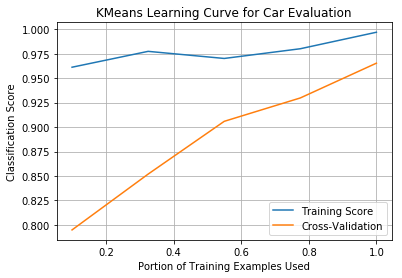

Train Time:  3.9513468742370605
Test Time:  0.00039005279541015625
Top Accuracy: 81.94444444444444
Top params:  {'alpha': 0.1, 'learning_rate_init': 0.1}
[[  7   0  13   0]
 [  2   4   9   0]
 [  2   0  53  48]
 [  0   0   4 290]]


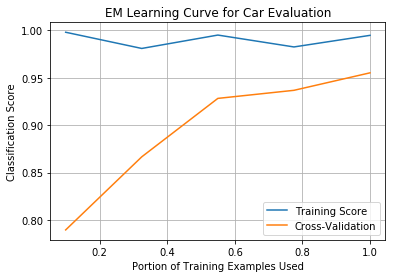

In [20]:

km_model = KMeans(n_clusters=4, random_state=42)
km_model.fit_predict(whole_dataset)
kmeans_data = km_model.labels_

em_model = GaussianMixture(n_components=4, random_state=42)
em_model.fit_predict(whole_dataset)
em_data = em_model.score_samples(whole_dataset)

X_train = np.concatenate((X_train_std,kmeans_data[0:1296].reshape(-1, 1)), axis=1) 
X_test = np.concatenate((X_test_std,kmeans_data[1296:].reshape(-1, 1)), axis=1) 

sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

nn = MLPClassifier(max_iter=2000,early_stopping=True,random_state=55)

best_nn = GridSearchCV(nn, param_grid={'alpha' : np.logspace(-1, 2, 5), 'learning_rate_init' : np.logspace(-5, 0, 6)}, cv=5, n_jobs=4)
train_t0 = time.time()
best_nn.fit(X_train_std, Y_train)
train_t1 = time.time()
t0 = time.time()
prediction = best_nn.predict(X_test_std)
t1 = time.time()

print('Train Time: ', train_t1 - train_t0)
print('Test Time: ', t1 - t0)
print('Top Accuracy:', (accuracy_score(Y_test, prediction) * 100))
print('Top params: ', best_nn.best_params_)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, prediction))

train_sizes, train_scores, test_scores = learning_curve(best_nn, X_train_std, Y_train, train_sizes=np.linspace(0.1, 1.0, 5), cv=5, n_jobs=4)
avg_train_score, avg_test_score = np.mean(train_scores, axis=1), np.mean(test_scores, axis=1)
plt.figure()
plt.plot(train_sizes/train_sizes[-1], avg_train_score, label='Training Score')
plt.plot(train_sizes/train_sizes[-1], avg_test_score, label='Cross-Validation')
plt.title('KMeans Learning Curve for Car Evaluation')
plt.xlabel('Portion of Training Examples Used')
plt.ylabel("Classification Score")
plt.legend()
plt.grid()
plt.show()

# EM

X_train = np.concatenate((X_train,em_data[0:1296].reshape(-1, 1)), axis=1) 
X_test = np.concatenate((X_test,em_data[1296:].reshape(-1, 1)), axis=1) 

sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

nn = MLPClassifier(max_iter=2000,early_stopping=True,random_state=55)

best_nn = GridSearchCV(nn, param_grid={'alpha' : np.logspace(-1, 2, 5), 'learning_rate_init' : np.logspace(-5, 0, 6)}, cv=5, n_jobs=4)
train_t0 = time.time()
best_nn.fit(X_train_std, Y_train)
train_t1 = time.time()
t0 = time.time()
prediction = best_nn.predict(X_test_std)
t1 = time.time()

print('Train Time: ', train_t1 - train_t0)
print('Test Time: ', t1 - t0)
print('Top Accuracy:', (accuracy_score(Y_test, prediction) * 100))
print('Top params: ', best_nn.best_params_)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, prediction))

train_sizes, train_scores, test_scores = learning_curve(best_nn, X_train_std, Y_train, train_sizes=np.linspace(0.1, 1.0, 5), cv=5, n_jobs=4)
avg_train_score, avg_test_score = np.mean(train_scores, axis=1), np.mean(test_scores, axis=1)
plt.figure()
plt.plot(train_sizes/train_sizes[-1], avg_train_score, label='Training Score')
plt.plot(train_sizes/train_sizes[-1], avg_test_score, label='Cross-Validation')
plt.title('EM Learning Curve for Car Evaluation')
plt.xlabel('Portion of Training Examples Used')
plt.ylabel("Classification Score")
plt.legend()
plt.grid()
plt.show()